In [1]:
import math
import os
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
def read_csv(name):
    return pd.read_csv(os.path.join(os.getcwd(), 'data', name))

sports = read_csv("sport.csv")
flowers = read_csv("flowers.csv")

# print(read_csv("sport.csv"))

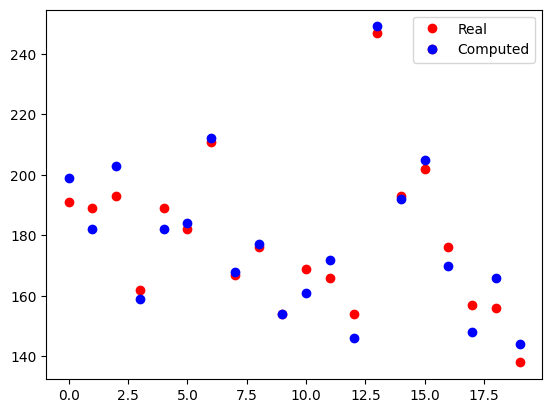

In [8]:
def plot_sport_predictions(feature):
    y = [x for x in range(len(sports[feature]))]
    real, = plt.plot(y, sports[feature], 'ro', label="real")
    computed, = plt.plot(y, sports["Predicted" + feature], 'bo', label="computed")
    plt.legend([real, (real, computed)], ["Real", "Computed"])
    plt.show()

plot_sport_predictions("Weight")

In [10]:
def calculate_error_regression_sum(real, computed):
    error = 0
    for r, c in zip(real, computed):
        error += sum([abs(r[index] - c[index]) for index in range(len(r))])

    return error / len(real[0])

def calculate_error_regression_sqrt(real, computed):
    error = 0
    for r, c in zip(real, computed):
        error += sum([((r[index] - c[index]) ** 2) for index in range(len(r))])

    return math.sqrt(error / len(real[0]))

print('Sum:', calculate_error_regression_sum([sports['Weight'], sports['Waist'], sports['Pulse']],
                                             [sports['PredictedWeight'], sports['PredictedWaist'],sports['PredictedPulse']]))

print('Sqrt:', calculate_error_regression_sqrt([sports['Weight'], sports['Waist'], sports['Pulse']],
                                               [sports['PredictedWeight'], sports['PredictedWaist'],
                                                sports['PredictedPulse']]))

Sum: 8.15
Sqrt: 6.5840716885526085


In [13]:
def evaluate_classification(real, computed, labels):
    calculated_accuracy = sum([1 if real[i] == computed[i] else 0 for i in range(len(real))]) / len(real)

    TP = {}
    FP = {}
    TN = {}
    FN = {}

    for label in labels:
        TP[label] = sum(
            [1 if (real[i] == label and computed[i] == label) else 0 for i in range(len(real))])
        FP[label] = sum(
            [1 if (real[i] != label and computed[i] == label) else 0 for i in range(len(real))])
        TN[label] = sum(
            [1 if (real[i] != label and computed[i] != label) else 0 for i in range(len(real))])
        FN[label] = sum(
            [1 if (real[i] == label and computed[i] != label) else 0 for i in range(len(real))])

        # print("For label:", label, TP[label], FP[label], TN[label], FN[label])

    precision = {}
    recall = {}

    for label in labels:
        precision[label] = TP[label] / (TP[label] + FP[label])
        recall[label] = TP[label] / (TP[label] + FN[label])

    return calculated_accuracy, precision, recall

flowers_types = list(set(flowers['Type']))
accuracy, precisions, recalls = evaluate_classification(flowers['Type'], flowers['PredictedType'],
                                                        flowers_types)
print('Accuracy:', accuracy)
print('Precision for', flowers_types[0], 'is', precisions[flowers_types[0]])
print('Precision for', flowers_types[1], 'is', precisions[flowers_types[1]])
print('Precision for', flowers_types[2], 'is', precisions[flowers_types[2]])
print('Recall for', flowers_types[0], 'is', recalls[flowers_types[0]])
print('Recall for', flowers_types[1], 'is', recalls[flowers_types[1]])
print('Recall for', flowers_types[2], 'is', recalls[flowers_types[2]])

Accuracy: 0.3076923076923077
Precision for Tulip is 0.2857142857142857
Precision for Rose is 0.25
Precision for Daisy is 0.36363636363636365
Recall for Tulip is 0.2857142857142857
Recall for Rose is 0.25
Recall for Daisy is 0.36363636363636365


In [16]:
def calculate_loss_regression_sum(real, computed):
    error = 0
    for r, c in zip(real, computed):
        for index in range(len(r)):
            error += abs(r[index] - c[index])
    return error

def evaluate_loss_binary_classification(real, computed, positive):
    real_outputs = [[1, 0] if label == positive else [0, 1] for label in real]
    no_of_classes = len(set(real))
    dataset_CE = 0.0
    for i in range(len(real)):
        sample_CE = - sum([real_outputs[i][j] * math.log(computed[i][j]) for j in range(no_of_classes)])
        dataset_CE += sample_CE
    mean_CE = dataset_CE / len(real)
    return mean_CE

def evaluate_multi_class_loss(target_values, raw_outputs):
    expected_values = [math.exp(value) for value in raw_outputs]
    sum_for_expected_values = sum(expected_values)
    map_outputs = [value / sum_for_expected_values for value in expected_values]
    sample_CE = - sum([target_values[j] * math.log(map_outputs[j]) for j in range(len(target_values))])
    return sample_CE

def evaluate_multi_label_loss(target_values, raw_outputs):
    mapOutputs = [1 / (1 + math.exp(-val)) for val in raw_outputs]
    sample_CE = - sum([target_values[j] * math.log(mapOutputs[j]) for j in range(len(target_values))])
    return sample_CE

real_values = ['spam', 'spam', 'ham', 'ham', 'spam', 'ham']
computed_outputs = [[0.7, 0.3], [0.2, 0.8], [0.4, 0.6], [0.9, 0.1], [0.7, 0.3], [0.4, 0.6]]

print('Loss regression:', calculate_loss_regression_sum([sports['Weight'], sports['Waist'], sports['Pulse']],
                                                     [sports['PredictedWeight'], sports['PredictedWaist'],
                                                      sports['PredictedPulse']]))
print('Loss binary:', evaluate_loss_binary_classification(real_values, computed_outputs, 'spam'))
print('Loss multi-class', evaluate_multi_class_loss([0, 1, 0, 0, 0], [-0.5, 1.2, 0.1, 2.4, 0.3]))
print('Loss multi-label:', evaluate_multi_label_loss([0, 1, 0, 0, 1], [-0.5, 1.2, 0.1, 2.4, 0.3]))


Loss regression: 163
Loss binary: 0.9411706901395985
Loss multi-class 1.6567491149507025
Loss multi-label: 0.8176377118065583
